CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64
(471910, 8)
BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object
  BasketID      BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365  01/12/10 08:26  2,55     17850.0  United Kingdom  85123A   
1   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   71053   
2   536365  01/12/10 08:26  2,75     17850.0  United Kingdom  84406B   
3   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029G   
4   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029E   
5   536365  01/12/10 08:26  7,65     17850.0  United Kingdom   22752   
6   536365  01/12/10 08:26 

C:\Users\hp\AppData\Local\Temp\ipykernel_22620\613873253.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  supermarket['BasketDate'] = pd.to_datetime(supermarket['BasketDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         406830 non-null  object        
 1   BasketDate       406830 non-null  datetime64[ns]
 2   Sale             406830 non-null  float64       
 3   CustomerID       406830 non-null  int32         
 4   CustomerCountry  406830 non-null  object        
 5   ProdID           406830 non-null  object        
 6   ProdDescr        406830 non-null  object        
 7   Qta              406830 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB
None
                          BasketDate           Sale     CustomerID  \
count                         406830  406830.000000  406830.000000   
mean   2011-06-21 04:30:14.097632768       3.460507   15287.684160   
min              2010-01-12 08:26:00       0.000

KeyError: 'Max_Year_Date'

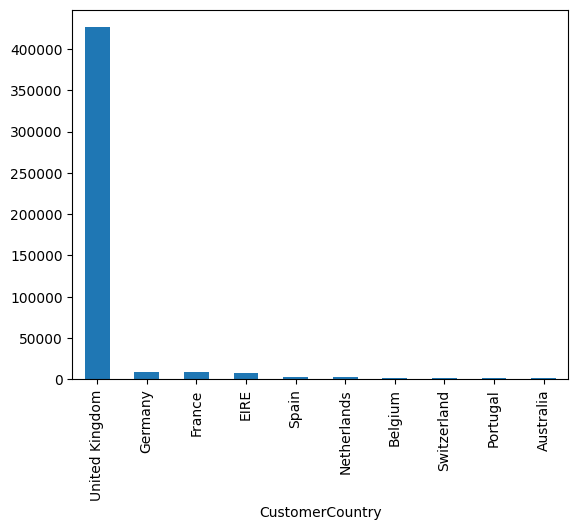

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

supermarket=pd.read_csv('E:/Work/customer_supermarket.csv',on_bad_lines='skip',sep='\t',index_col=0)
#data= supermarket[pd.notnull(supermarket['CustomerID'])]
#print(data)
print(supermarket['CustomerID'].value_counts())
supermarket['CustomerCountry'].value_counts()[:10].plot(kind='bar')
print(supermarket.shape)
print(supermarket.dtypes)
#Select Top 10 Values
print(supermarket.head(10))
#Description of Data frame
print(supermarket.describe())
#Column Names
print(supermarket.columns)
#Get Null Coumnt
print(supermarket.isnull().sum())
print(supermarket['BasketDate'].nunique())
data= supermarket[pd.notnull(supermarket['CustomerID'])]
#supermarket['Sale'] = supermarket['Sale'].str.split(',')                                                               
#supermarket.explode('Sale')
print(data)
print(supermarket["CustomerID"].unique().sum())

#remove null values
supermarket = supermarket.dropna()
#supermarket=data[['CustomerCountry','CustomerID']].drop_duplicates()
#Check Null values after remove.
print(supermarket.isnull().sum())

codes=supermarket[supermarket["BasketID"].str.contains('^[a-zA-Z]+',regex=True)]["BasketID"].unique()
print(pd.Series(codes).apply(lambda x:x[0]).unique())
print('Conains C in BasketID: {0}'.format(supermarket[supermarket["BasketID"].str.contains('C')].shape[0]))
print('Conains A in BasketID: {0}'.format(supermarket[supermarket["BasketID"].str.contains('A')].shape[0]))
#Convert Customerid column as Int
supermarket["CustomerID"]=supermarket["CustomerID"].astype('int')
supermarket['BasketDate'] = pd.to_datetime(supermarket['BasketDate'])
supermarket['Sale'] = supermarket['Sale'].str.replace(',','.')
supermarket['Sale'] =supermarket['Sale'].astype(float)
print(supermarket.info())
print(supermarket.describe())
supermarket =supermarket[(supermarket['Qta']>0)]
print(supermarket.describe())
print(supermarket.dtypes)
print(supermarket)
NOW = pd.to_datetime('now')
#RFM_table=supermarket.groupby('CustomerID').agg({'BasketDate': lambda x: (NOW - x.max()).days, # Recency
#'BasketDate': lambda x: len(x.unique()), # Frequency
#                                     'Sale': lambda x: x.sum()})    # Monetary 
#print(RFM_table)
#supermarket['R'] = (pd.to_datetime('now') - supermarket['BasketDate']).dt.days
#supermarket['F'] = supermarket.groupby('CustomerID')['BasketDate'].count()
#supermarket['M'] = supermarket.groupby('CustomerID')['Sale'].sum()
#print(supermarket.head(10))
#print(supermarket.tail(10))
print('Conains C in BasketID: {0}'.format(supermarket[supermarket["BasketID"].str.contains('C')].shape[0]))
print('Conains A in BasketID: {0}'.format(supermarket[supermarket["BasketID"].str.contains('A')].shape[0]))
recancy=supermarket.groupby('CustomerID').agg({'BasketDate': lambda x: (NOW - x.max()).days})
print(recancy)
frequency=supermarket.drop_duplicates(subset='BasketID').groupby(['CustomerID'])[["BasketID"]].count()
#Check After Drop
print(frequency)
supermarket['Total']=supermarket['Sale']* supermarket['Qta']
money=supermarket.groupby('CustomerID')[["Total"]].sum()
print(money)
supermarket['Date_Interval'] = supermarket['Max_Year_Date'] - supermarket['BasketDate']
supermarket['Max_Year_Date'] = supermarket['BasketDate'].max() 
supermarket['Year'] = supermarket['BasketDate'].dt.year
rfm_gb = supermarket.groupby(['Year', 'CustomerID'], as_index = False).agg({'Date_Interval': 'min', 'BasketID': 'count', 'Sale': 'mean'})
rfm_gb.columns = ['Year', 'CustomerID', 'R', 'F', 'M']
print(rfm_gb)

In [2]:
RFM=pd.concat([recancy,frequency,money],axis=1)
recancy.columns=["Recancy"]
frequency.columns=["Frequency"]
money.columns=['Monetary']

In [3]:
RFM

,BasketDate,BasketID,Total
CustomerID,,,
12346,4664,1,77183.60
12347,4377,7,4310.00
12348,4413,4,1797.24
12349,4357,1,1757.55
12350,4648,1,334.40
...,...,...,...
18280,4498,1,180.60
18281,4342,1,80.82
18282,4553,2,178.05


In [4]:
cus=supermarket[supermarket['CustomerID']==12347]

In [5]:
cus.BasketID.value_counts()

BasketID
573511    47
537626    31
542237    29
549222    24
562032    22
556201    18
581180    11
Name: count, dtype: int64

In [41]:
supermarket[supermarket['BasketID']=='556201']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Total
220572,556201,2011-09-06 13:01:00,2.08,12347,Iceland,23084,RABBIT NIGHT LIGHT,12,24.96
220573,556201,2011-09-06 13:01:00,3.75,12347,Iceland,23162,REGENCY TEA STRAINER,8,30.00
220574,556201,2011-09-06 13:01:00,1.65,12347,Iceland,23171,REGENCY TEA PLATE GREEN,12,19.80
220575,556201,2011-09-06 13:01:00,1.65,12347,Iceland,23172,REGENCY TEA PLATE PINK,12,19.80
220576,556201,2011-09-06 13:01:00,1.65,12347,Iceland,23170,REGENCY TEA PLATE ROSES,12,19.80
220577,556201,2011-09-06 13:01:00,9.95,12347,Iceland,23173,REGENCY TEAPOT ROSES,2,19.90
220578,556201,2011-09-06 13:01:00,4.15,12347,Iceland,23174,REGENCY SUGAR BOWL GREEN,4,16.60
220579,556201,2011-09-06 13:01:00,3.25,12347,Iceland,23175,REGENCY MILK JUG PINK,4,13.00
220580,556201,2011-09-06 13:01:00,4.25,12347,Iceland,22371,AIRLINE BAG VINTAGE TOKYO 78,8,34.00
220581,556201,2011-09-06 13:01:00,4.25,12347,Iceland,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,17.00


In [ ]:
#from sklearn.preprocessing import StandardScaler
#Scaler=StandardScaler()
#scaled=Scaler.fit_transform(RFM)

In [ ]:
#from sklearn.cluster import KMeans
#inertia=[]
#for i in np.arange(1,11):
#  kmeans=KMeans(n_clusters=int(i))
#  kmeans.fit(scaled)
#  inertia.append(kmeans.inertia_)
#plt.plot(inertia,kind="bar")

In [43]:
#kmeans=KMeans(n_clusters=3)
#kmeans.fit(scaled)
#RFM["Clusters"]=(kmeans.labels_)

In [6]:
RFM.head(10)

,BasketDate,BasketID,Total
CustomerID,,,
12346,4664,1,77183.60
12347,4377,7,4310.00
12348,4413,4,1797.24
12349,4357,1,1757.55
12350,4648,1,334.40
12352,4410,8,2506.04
12353,4542,1,89.00
12354,4570,1,1079.40
12355,4433,1,459.40


In [47]:
#RFM['RFM_Score'] = RFM[['Recancy','Frequency','Monetary']].sum(axis=1)

In [7]:
RFM.head(10)

,BasketDate,BasketID,Total
CustomerID,,,
12346,4664,1,77183.60
12347,4377,7,4310.00
12348,4413,4,1797.24
12349,4357,1,1757.55
12350,4648,1,334.40
12352,4410,8,2506.04
12353,4542,1,89.00
12354,4570,1,1079.40
12355,4433,1,459.40


In [48]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return "Can not Loose Them"
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
    

In [49]:
#RFM['RFM_Level'] = RFM.apply(rfm_level, axis=1)


KeyError: 'RFM_Score'

In [50]:
RFM.head(10)

,BasketDate,BasketID,Total
CustomerID,,,
12346,4663,1,77183.60
12347,4377,7,4310.00
12348,4413,4,1797.24
12349,4356,1,1757.55
12350,4648,1,334.40
12352,4410,8,2506.04
12353,4542,1,89.00
12354,4570,1,1079.40
12355,4433,1,459.40


In [52]:
grp=RFM.groupby(["Clusters"])[['Recancy','Frequency','Monetary']].mean()

KeyError: 'Clusters'

In [53]:
def func(row):
 if row["Clusters"]==1:
    return 'Avg.Cx'
 elif row["Clusters"]==2:
    return 'Whales'
 else:
    return 'Lapsed Cx'

In [54]:
RFM["Condition"]=RFM.apply(func,axis=1)


KeyError: 'Clusters'

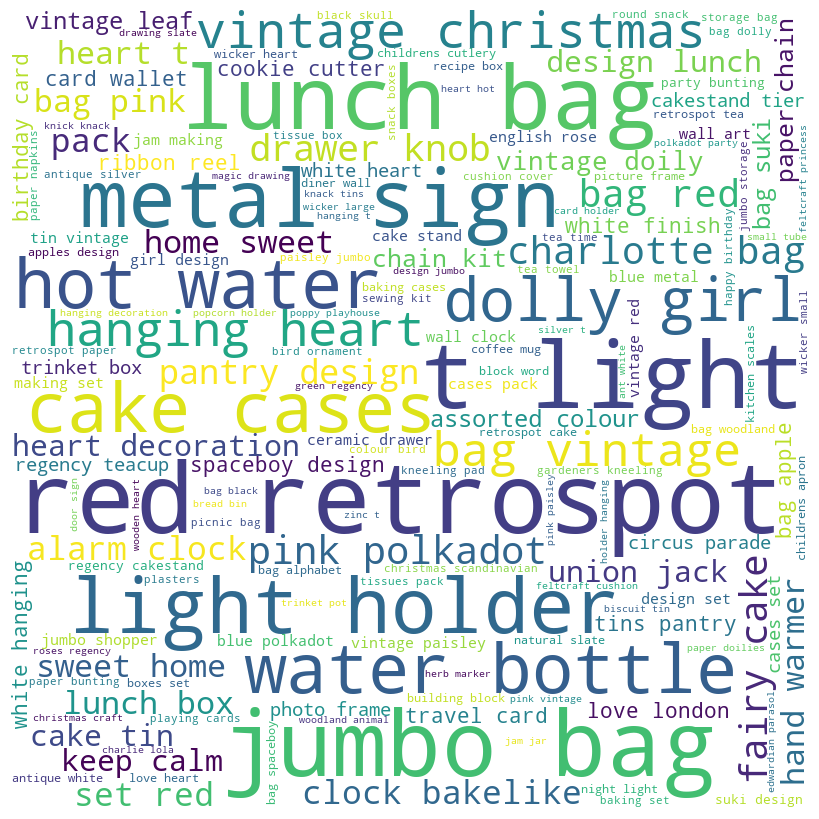

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in supermarket['ProdDescr']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [56]:
supermarket['Max_Year_Date'] = supermarket['BasketDate'].max() 
supermarket['Date_Interval'] = supermarket['Max_Year_Date'] - supermarket['BasketDate']
supermarket['Year'] = supermarket['BasketDate'].dt.year
rfm_gb = supermarket.groupby(['Year', 'CustomerID'], as_index = False).agg({'Date_Interval': 'min', 'BasketID': 'count', 'Sale': 'mean'})
rfm_gb.columns = ['Year', 'CustomerID', 'R', 'F', 'M']
print(rfm_gb)

      Year  CustomerID                 R    F         M
0     2010       12347 516 days 02:22:00   31  2.890000
1     2010       12348 358 days 22:10:00   17  2.917647
2     2010       12370 358 days 07:41:00   91  2.894286
3     2010       12377 355 days 07:42:00   43  2.106279
4     2010       12383 353 days 02:51:00   37  1.325135
...    ...         ...               ...  ...       ...
5100  2011       18280 160 days 07:27:00   10  4.765000
5101  2011       18281   4 days 06:26:00    7  5.622857
5102  2011       18282 216 days 03:44:00   12  5.199167
5103  2011       18283  10 days 04:20:00  756  1.614987
5104  2011       18287   0 days 06:56:00   70  1.493571

[5105 rows x 5 columns]


C:\Users\hp\AppData\Local\Temp\ipykernel_9480\204476545.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_gb['R'],)
C:\Users\hp\AppData\Local\Temp\ipykernel_9480\204476545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_gb['F'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9480\2044765

<Axes: xlabel='M', ylabel='Density'>

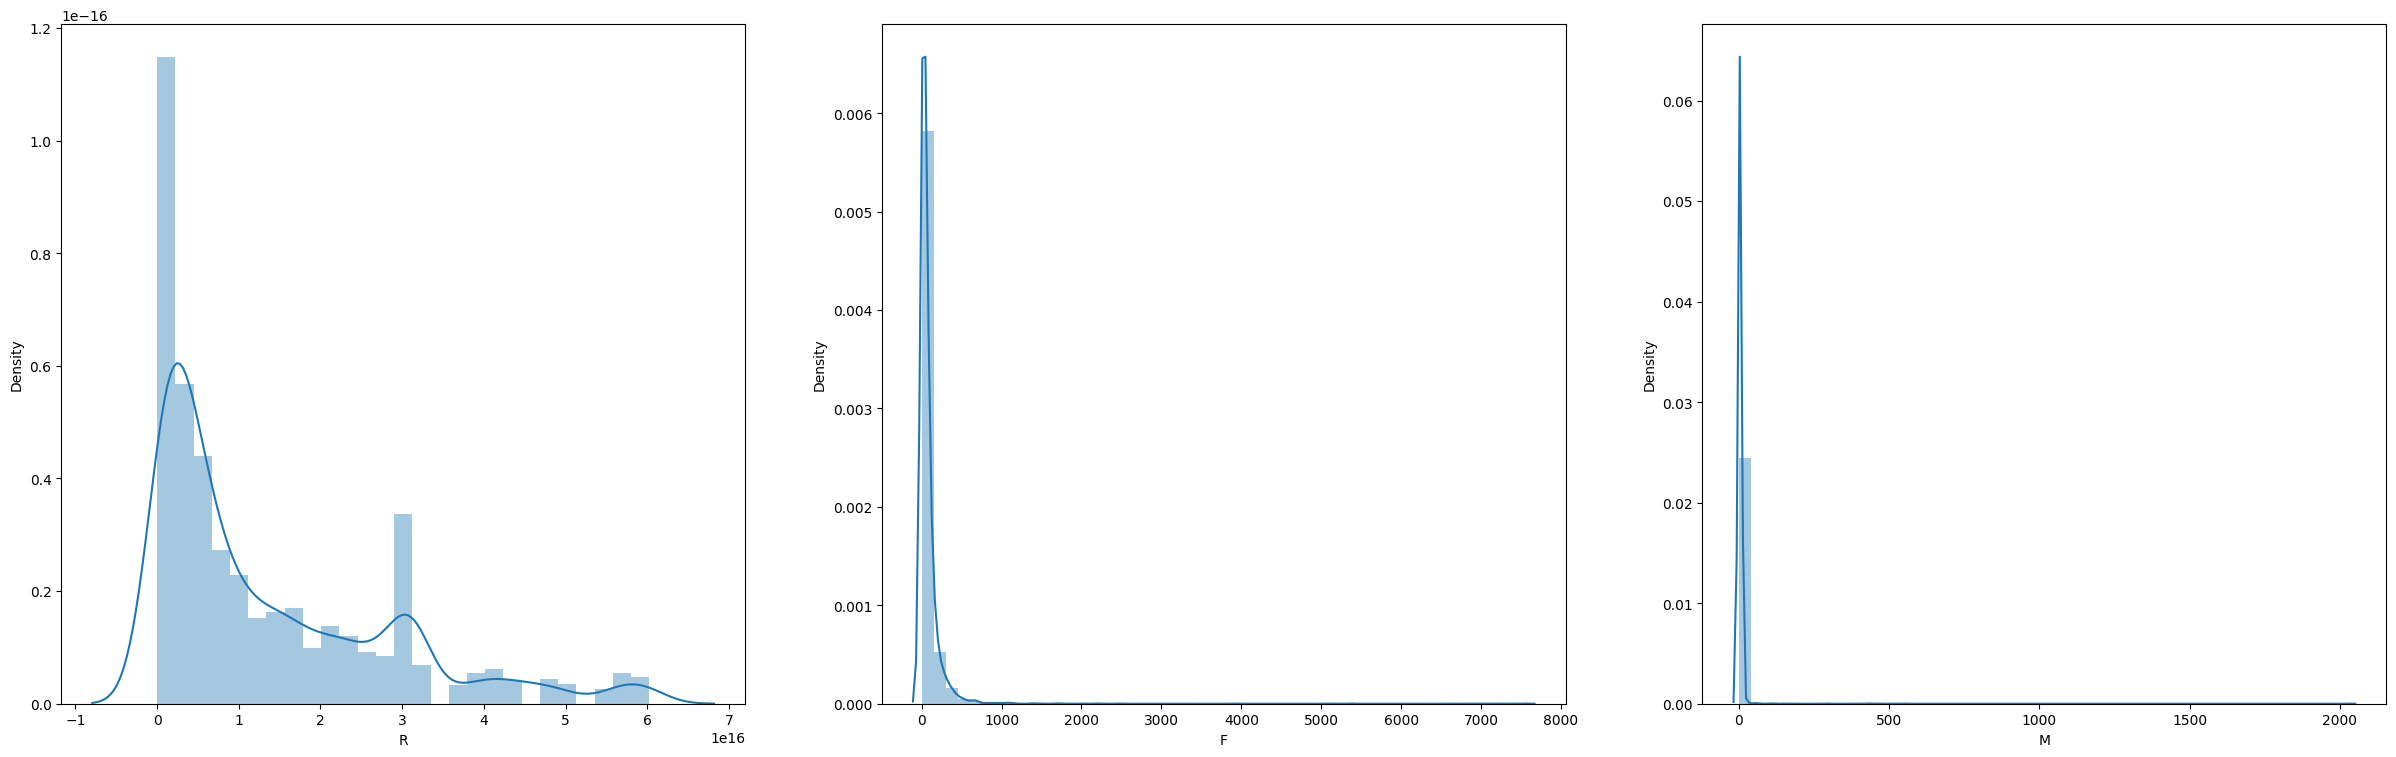

In [57]:
plt.figure(figsize=(30, 30))
plt.subplot(3, 3, 1)
sns.distplot(rfm_gb['R'],)
plt.subplot(3, 3, 2)
sns.distplot(rfm_gb['F'])
plt.subplot(3, 3, 3)
sns.distplot(rfm_gb['M'])

In [58]:
 rfm_gb.head(10)

,Year,CustomerID,R,F,M
0,2010,12347,516 days 02:22:00,31,2.890000
1,2010,12348,358 days 22:10:00,17,2.917647
2,2010,12370,358 days 07:41:00,91,2.894286
3,2010,12377,355 days 07:42:00,43,2.106279
4,2010,12383,353 days 02:51:00,37,1.325135
5,2010,12386,485 days 07:26:00,8,2.726250
6,2010,12395,358 days 01:19:00,31,3.390000
7,2010,12417,358 days 05:28:00,11,7.003636
8,2010,12423,354 days 06:25:00,16,2.636875
9,2010,12427,638 days 06:35:00,10,4.925000


In [59]:
    rfm_gb['R_Quartile'] = pd.qcut(rfm_gb['R'], 4, ['1','2','3','4'])
    rfm_gb['F_Quartile'] = pd.qcut(rfm_gb['F'], 4, ['4','3','2','1'])
    rfm_gb['M_Quartile'] = pd.qcut(rfm_gb['M'], 4, ['4','3','2','1'])
    rfm_gb.head(10)

,Year,CustomerID,R,F,M,R_Quartile,F_Quartile,M_Quartile
0,2010,12347,516 days 02:22:00,31,2.890000,4,3,3
1,2010,12348,358 days 22:10:00,17,2.917647,4,3,2
2,2010,12370,358 days 07:41:00,91,2.894286,4,1,3
3,2010,12377,355 days 07:42:00,43,2.106279,4,2,4
4,2010,12383,353 days 02:51:00,37,1.325135,4,2,4
5,2010,12386,485 days 07:26:00,8,2.726250,4,4,3
6,2010,12395,358 days 01:19:00,31,3.390000,4,3,2
7,2010,12417,358 days 05:28:00,11,7.003636,4,4,1
8,2010,12423,354 days 06:25:00,16,2.636875,4,3,3
9,2010,12427,638 days 06:35:00,10,4.925000,4,4,1


In [61]:
    #Quantile 1 Considered as Top score and Quantile 4 Considered as the lowest score for all Recency Frequency & Monetary
    #Now we can combine all three Quantile score in a single column, and it will help us to create the logic base Customer segmentation as per the business criteria.
    #111 will be considered as the best performing customer as they have lowest recency and highest frequency and monetary. 444 will be the worst segment
    rfm_gb['RFM_Score'] = rfm_gb.R_Quartile.astype(str)+ rfm_gb.F_Quartile.astype(str) + rfm_gb.M_Quartile.astype(str)
    rfm_gb.head()
    # Filter out Top/Best customers as (111)
    rfm_gb[rfm_gb['RFM_Score']=='111'].sort_values('M', ascending=False).head(30)

,Year,CustomerID,R,F,M,R_Quartile,F_Quartile,M_Quartile,RFM_Score
3145,2011,15502,16 days 04:31:00,185,21.844378,1,1,1,111
1145,2011,12669,3 days 07:25:00,101,13.741386,1,1,1,111
1212,2011,12757,4 days 22:17:00,371,11.912642,1,1,1,111
2208,2011,14180,11 days 06:23:00,191,9.698639,1,1,1,111
897,2011,12359,9 days 04:36:00,248,8.620403,1,1,1,111
1072,2011,12584,18 days 08:45:00,96,7.484375,1,1,1,111
1103,2011,12619,17 days 02:27:00,90,7.056556,1,1,1,111
2065,2011,13983,0 days 02:46:00,92,6.931630,1,1,1,111
3121,2011,15465,4 days 06:12:00,85,6.672706,1,1,1,111
1177,2011,12712,9 days 05:33:00,113,6.573805,1,1,1,111


In [23]:
rfm_gb.head(20)

,Year,CustomerID,R,F,M,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0,2010,12347,516 days 02:22:00,31,2.890000,4,3,3,433
1,2010,12348,358 days 22:10:00,17,2.917647,4,3,2,432
2,2010,12370,358 days 07:41:00,91,2.894286,4,1,3,413
3,2010,12377,355 days 07:42:00,43,2.106279,4,2,4,424
4,2010,12383,353 days 02:51:00,37,1.325135,4,2,4,424
5,2010,12386,485 days 07:26:00,8,2.726250,4,4,3,443
6,2010,12395,358 days 01:19:00,31,3.390000,4,3,2,432
7,2010,12417,358 days 05:28:00,11,7.003636,4,4,1,441
8,2010,12423,354 days 06:25:00,16,2.636875,4,3,3,433
9,2010,12427,638 days 06:35:00,10,4.925000,4,4,1,441


In [62]:
supermarket["BasketID"]

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541905    581587
541906    581587
541907    581587
541908    581587
541909    581587
Name: BasketID, Length: 397925, dtype: object